Original Training Shape: (9852, 33)
Applying SMOTE... this may take a moment.
New Balanced Training Shape: (25053, 33)
Training Random Forest Model...

--- Model Evaluation ---
Accuracy Score: 0.8108766233766234

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.32      0.18      0.23       363
           2       0.85      0.94      0.89      2064

    accuracy                           0.81      2464
   macro avg       0.39      0.37      0.37      2464
weighted avg       0.76      0.81      0.78      2464



C:\Users\user\AppData\Local\Temp\ipykernel_17400\3479652771.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


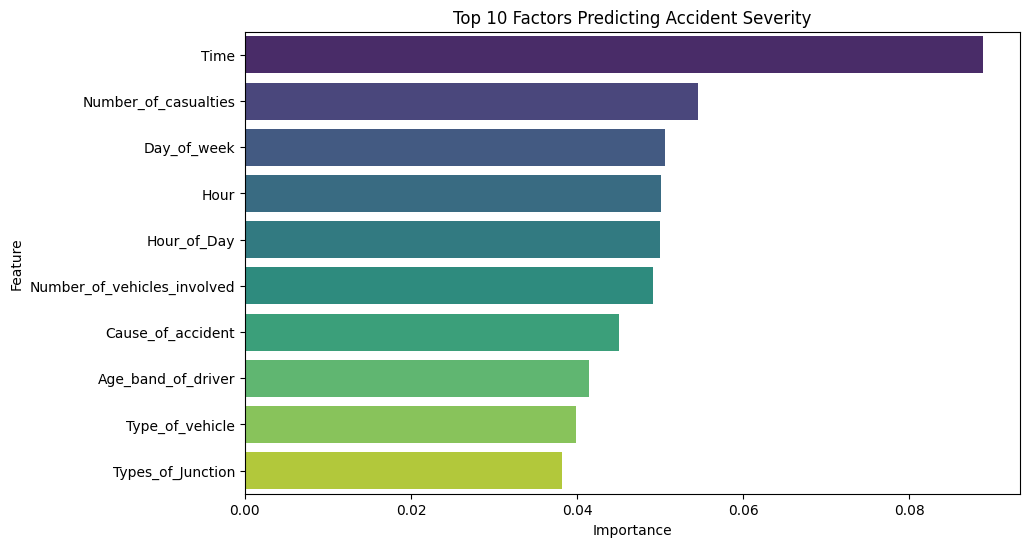

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE # The tool to fix the imbalance

# 1. Load the fully encoded data
df = pd.read_csv('encoded_rta_data.csv')

# 2. Split Features (X) and Target (y)
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

# 3. Create Training and Test Sets
# We use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Training Shape: {X_train.shape}")

# 4. Apply SMOTE to balance the data (Only on Training data!)
print("Applying SMOTE... this may take a moment.")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"New Balanced Training Shape: {X_train_resampled.shape}")

# 5. Train the Random Forest Model
print("Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 6. Evaluate the Model
y_pred = rf_model.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Feature Importance (What causes accidents?)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Factors Predicting Accident Severity')
plt.show()

<Figure size 1000x700 with 0 Axes>

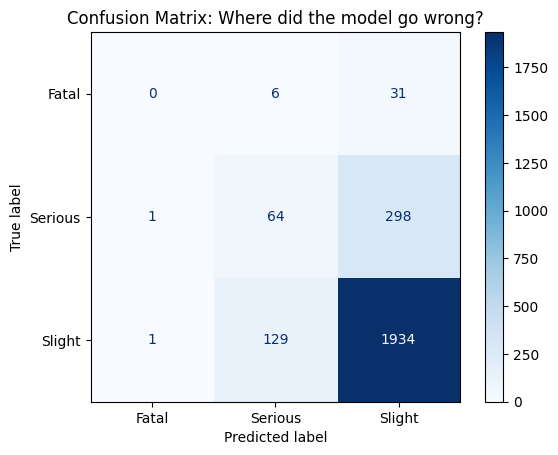

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(10, 7))
# Assuming your classes are 0=Fatal, 1=Serious, 2=Slight
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fatal', 'Serious', 'Slight'])
cmd.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Where did the model go wrong?')
plt.show()